In [9]:
import sys
import os
sys.path.insert(0, os.getcwd()+"/Utils")
import PolyTurk as pt
TRIAL_ID = 10
MASK_PATH = '/home/andrew/ImageSegmentation/Training/Trial'+str(TRIAL_ID)+'/masks/'
IMG_PATH = '/home/andrew/ImageSegmentation/Training/Raw_Images_1024/'

trial_inputs = {
    'TRIAL_ID': TRIAL_ID,
    'MASK_PATH': MASK_PATH,
    'IMG_PATH': IMG_PATH
}

## Initialize Turk object

In [10]:
turk = pt.Turk(trial_inputs)

Number of HITs: 288
Reviewable Assignments: 50


In [11]:
trial_data = turk.getTaskData()

## Preview Results

In [12]:
import pandas as pd
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import base64

pd.set_option('display.max_colwidth', -1)

def get_thumbnail(paths):
    bg = Image.open(paths[0])
    rgbimg = Image.new("RGBA", bg.size)
    rgbimg.paste(bg)
    fg = Image.open(paths[1])
    rgbimg.paste(fg, (0, 0), fg)
    rgbimg.thumbnail((150, 150), Image.LANCZOS)
    return rgbimg

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df = pd.DataFrame(trial_data)
df = df.drop(columns=['Answer'], axis=1)


#qgrid_widget = qgrid.show_grid(df.groupby('Worker'), show_toolbar=True)
#qgrid_widget
dfworker = df.groupby(['Worker','AssignmentID'])
dfworker.first()

import qgrid
qgrid_widget=qgrid.show_grid(dfworker.first(),show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [13]:
dfworker['AssignmentID'].first()

Worker          AssignmentID                  
A1RECYT97C7ZWK  32EYX73OY09Q0N59WBXXY9VBMHSRUI    32EYX73OY09Q0N59WBXXY9VBMHSRUI
                352YTHGROVDEUVXRL0UL71VB0VH4HM    352YTHGROVDEUVXRL0UL71VB0VH4HM
                369J354OFDAE9M6UKI5IJZ3OHM2G6C    369J354OFDAE9M6UKI5IJZ3OHM2G6C
                36DSNE9QZ5YEPU2ZSKCFXCHVUE8JO3    36DSNE9QZ5YEPU2ZSKCFXCHVUE8JO3
                37W3JXSD668CPS60564SOT95AKQYWY    37W3JXSD668CPS60564SOT95AKQYWY
                3A1COHJ8NJVFDWKTX3KYODBG2IZH8U    3A1COHJ8NJVFDWKTX3KYODBG2IZH8U
                3A1PQ49WVHHX2W08YIBJ93O8OBR1HQ    3A1PQ49WVHHX2W08YIBJ93O8OBR1HQ
                3CCZ6YKWR7J3B8J81TP3ZC31HFV59V    3CCZ6YKWR7J3B8J81TP3ZC31HFV59V
                3IAEQB9FMEK9RHB99AHEB8Z4SYVWD3    3IAEQB9FMEK9RHB99AHEB8Z4SYVWD3
                3J2UYBXQQLCHYIV96GGFY7G8A7506P    3J2UYBXQQLCHYIV96GGFY7G8A7506P
                3JZQSN0I3QAASFZ5LB8MD5G1ALHGFR    3JZQSN0I3QAASFZ5LB8MD5G1ALHGFR
                3OJSZ2ATDSWZXPVFMWRJLGCVMPA57M    3OJSZ2ATDSWZ

,Worker,Preview,Score,Approved
0,A2RSR0CWMM7YSM,,10,False
1,A2GDEBPTVPO10C,,10,False
2,A1RECYT97C7ZWK,,10,False
3,A2EBYJVHW8NGM2,,10,False
4,A2F9FURICZCOY3,,10,False
5,A2F9FURICZCOY3,,10,False
6,A2GDEBPTVPO10C,,10,False
7,A2GDEBPTVPO10C,,10,False
8,A1RECYT97C7ZWK,,10,False
9,A1RECYT97C7ZWK,,10,False

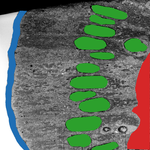
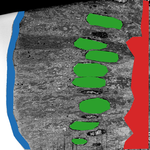
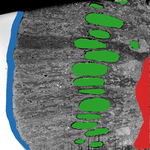
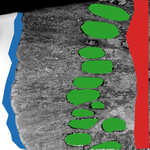
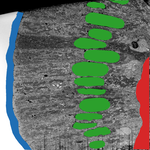
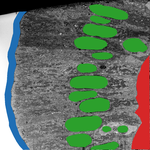
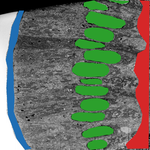
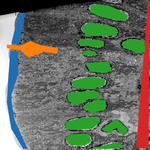
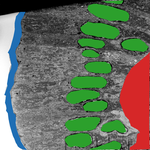
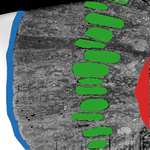
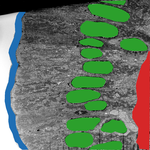
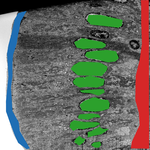
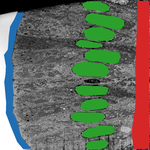
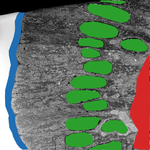
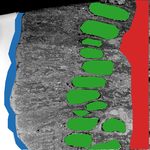
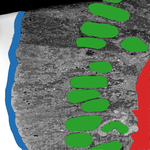
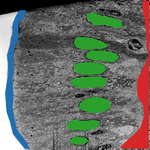
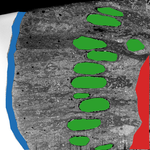
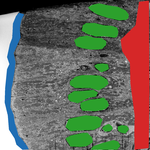
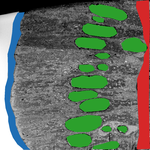
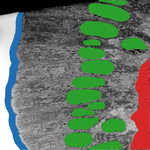
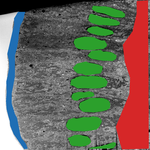
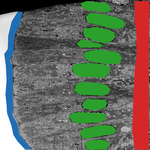
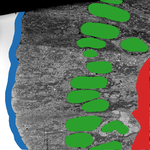
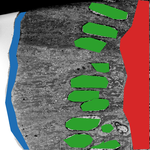
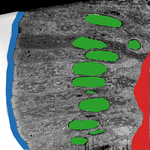
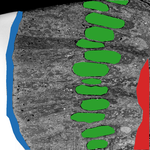
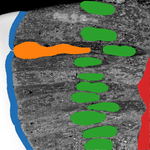
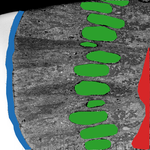
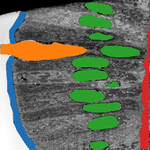
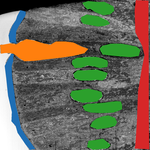
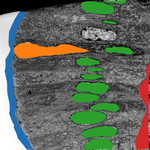
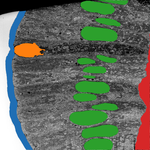
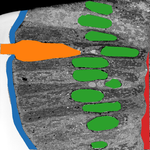
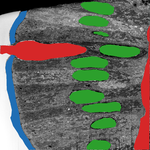
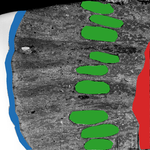
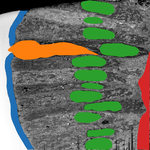
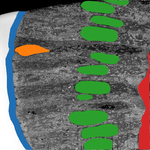
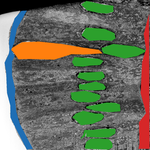
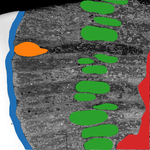
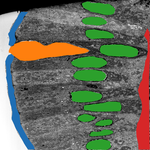
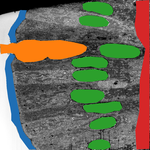
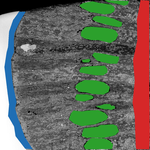
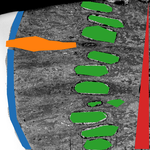
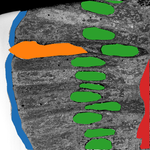
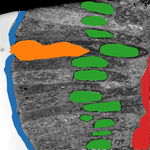
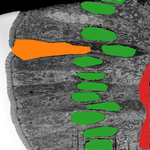
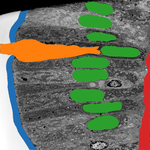
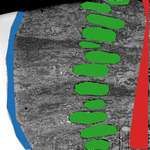
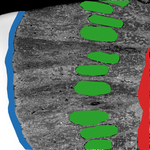

In [14]:
import pandas as pd
df = pd.DataFrame(trial_data)
df['URLs'] = df[['Image_Path', 'Mask_Path']].values.tolist()
df['Preview'] = df.URLs.map(lambda f: get_thumbnail(f))
#df.sort_values(by=['Worker'])
#df.pivot(index='Worker', columns='Image_ID', values='Avg_Poly_Verts')
HTML(df[['Worker', 'Preview','Score','Approved']].to_html(formatters={'Preview': image_formatter}, escape=False))
#df